In [1]:
%matplotlib inline 

#import data manipulation libraries
import numpy as np
import pandas as pd
#import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
##import tree plotting from sklearn
from sklearn.tree import export_graphviz
#import model selection libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#import feature selection libraries from sklearn
from sklearn.decomposition import PCA
#import metrics libraries from sklearn
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
##import classifier libraries from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#import python os library
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# Read in data and display first 5 rows
data = pd.read_csv('heart.csv')
data.head(5)



In [2]:
# print dataset size
print('The shape of our features is:', data.shape)

The shape of our features is: (303, 14)


In [3]:
# print data types of features
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
# column rename
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


In [5]:
# culumn rename for one hot encoding for feature SEX
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'
# culumn rename for one hot encoding for feature chest_pain_type
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'
# culumn rename for one hot encoding for feature fasting_blood_sugar
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'
# culumn rename for one hot encoding for feature rest_ecg
data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'
# culumn rename for one hot encoding for feature exercise_induced_angina
data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'
# culumn rename for one hot encoding for feature st_slope
data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'
# culumn rename for one hot encoding for feature thalassemia
data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

#get feature list
feature_list = list(data.columns)

C:\Users\Windula\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Windula\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Windula\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Windula\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCo

In [6]:
#identify NAN values
data.isna().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [7]:
#drop NAN values
data = data.dropna()

In [8]:
#one hot encoding
data = pd.get_dummies(data, drop_first=True)

In [9]:
#split into train and test data
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)
train_dataset.head(5)


,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
225,70,145,174,125,2.6,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
152,64,170,227,155,0.6,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1
228,59,170,288,159,0.2,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1
201,60,125,258,141,2.8,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1
52,62,130,231,146,1.8,3,1,1,1,0,0,1,0,0,0,0,1,0,0,1


<Figure size 1440x864 with 0 Axes>

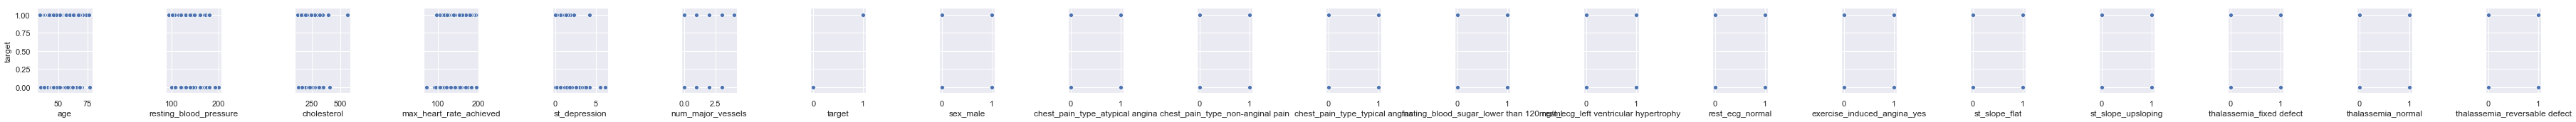

In [10]:
#display pair plot with target
plt.figure(figsize=(20,12)) 
sns.pairplot(train_dataset, diag_kind="kde",x_vars=train_dataset.columns,y_vars=['target'])

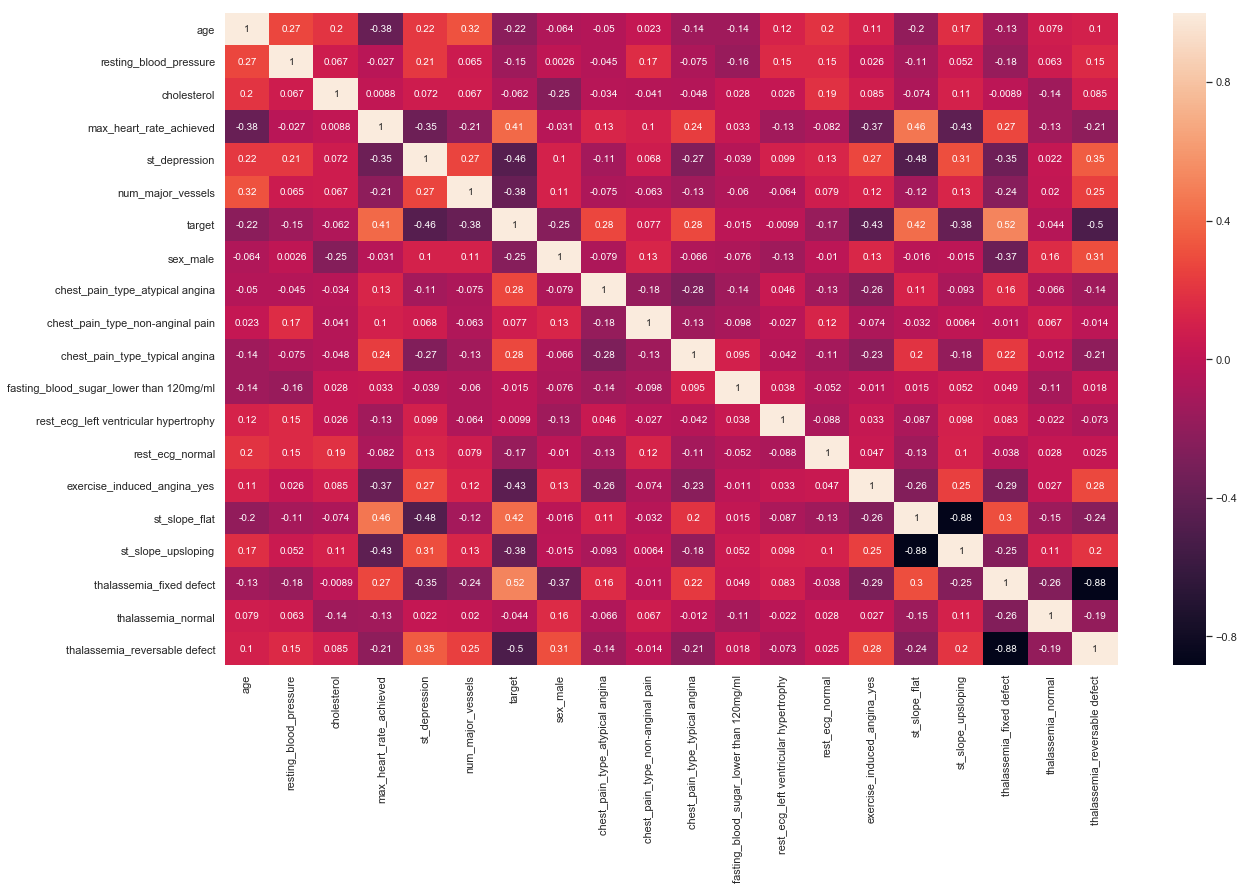

In [11]:
# display correlation heat map
plt.figure(figsize=(20,12)) 
sns.heatmap(train_dataset.corr(), annot=True)

In [12]:
#split train and test labels
train_labels = train_dataset.pop('target')
test_labels = test_dataset.pop('target')
#print dataset shape
print('Training Features Shape:', train_dataset.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_dataset.shape)
print('Testing Labels Shape:', test_labels.shape)
#describe train dataset
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

Training Features Shape: (242, 19)
Training Labels Shape: (242,)
Testing Features Shape: (61, 19)
Testing Labels Shape: (61,)


,count,mean,std,min,25%,50%,75%,max
age,242.0,54.128099,8.904992,34.0,48.0,54.5,60.75,77.0
resting_blood_pressure,242.0,131.396694,17.352331,94.0,120.0,130.0,140.00,200.0
cholesterol,242.0,247.181818,51.235037,126.0,212.0,241.5,274.00,564.0
max_heart_rate_achieved,242.0,149.797521,22.935873,71.0,134.5,153.0,167.75,195.0
st_depression,242.0,0.991322,1.162148,0.0,0.0,0.6,1.60,6.2
num_major_vessels,242.0,0.685950,0.985649,0.0,0.0,0.0,1.00,4.0
sex_male,242.0,0.685950,0.465098,0.0,0.0,1.0,1.00,1.0
chest_pain_type_atypical angina,242.0,0.276860,0.448374,0.0,0.0,0.0,1.00,1.0
chest_pain_type_non-anginal pain,242.0,0.078512,0.269534,0.0,0.0,0.0,0.00,1.0
chest_pain_type_typical angina,242.0,0.173554,0.379510,0.0,0.0,0.0,0.00,1.0


In [13]:
#function definition for normalizing
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [14]:
#function definition for PCA
def PCA_Analysis(features,labels):
    pca=PCA(n_components=3)
    featureD=pca.fit_transform(features)
    #labelD=pca.fit_transform(labels)
    Feature_df=pd.DataFrame(data=featureD)
    #Label_df=pd.DataFrame(data=labelD)
    finalDF=pd.concat([Feature_df,labels],axis=1)
    finalDF.head(5)
    pca.explained_variance_ratio_
    return Feature_df;

In [15]:
#function definition for Random Forest Classifier model
def RandomForestModel(train_features,train_labels):
    rf = RandomForestClassifier(n_estimators = 1000, random_state = 42,max_depth=5);
    rf.fit(train_features, train_labels);
    return rf;

In [16]:
#function definition for Logistic Regression model
def LoisticRegressorModel(train_features,train_labels):
    logreg = LogisticRegression(C=1, solver='lbfgs', multi_class='auto');
    logreg.fit(train_features,train_labels);
    return logreg;

In [17]:
#function definition for Support Vector Model
def SupportVectorModel(train_features,train_labels):
    svc = svm.SVC(C=1,kernel='rbf',gamma='scale',probability=True);
    svc.fit(train_features,train_labels);
    return svc;

In [18]:
#function definition for important feautre selection
def TreeFeatureSelection(train_features,train_labels,rf):
    
    feature_list=list(train_features.columns)
    # Get numerical feature importances
    importances = list(rf.feature_importances_)
# List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
    importances = rf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

# Print the feature ranking
    print("Feature ranking:")

    tempList=[]
    for f in range(train_features.shape[1]):
        tempList.append(feature_list[indices[f]])

# Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.barh(range(train_features.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.yticks(range(train_features.shape[1]), tempList)
    plt.ylim([-1, train_features.shape[1]])
    plt.show()

In [19]:
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)
# train_data_pca=PCA_Analysis(normed_train_data,train_labels)
# test_data_pca=PCA_Analysis(normed_test_data,test_labels)


In [20]:
# rf=RandomForestModel(train_data_pca,train_labels)
# predictions = rf.predict(test_data_pca)
# #accuracy = 100.0 * accuracy_score(test_labels, predictions)
# #print ("The accuracy of your algorithm on testing data is: " + str(accuracy))
# predictions

Variable: st_depression        Importance: 0.14
Variable: thalassemia_fixed defect Importance: 0.12
Variable: thalassemia_reversable defect Importance: 0.11
Variable: max_heart_rate_achieved Importance: 0.1
Variable: num_major_vessels    Importance: 0.1
Variable: exercise_induced_angina_yes Importance: 0.07
Variable: age                  Importance: 0.06
Variable: st_slope_flat        Importance: 0.06
Variable: resting_blood_pressure Importance: 0.05
Variable: cholesterol          Importance: 0.05
Variable: st_slope_upsloping   Importance: 0.04
Variable: chest_pain_type_atypical angina Importance: 0.03
Variable: sex_male             Importance: 0.02
Variable: chest_pain_type_non-anginal pain Importance: 0.02
Variable: rest_ecg_normal      Importance: 0.02
Variable: chest_pain_type_typical angina Importance: 0.01
Variable: fasting_blood_sugar_lower than 120mg/ml Importance: 0.01
Variable: thalassemia_normal   Importance: 0.01
Variable: rest_ecg_left ventricular hypertrophy Importance: 0

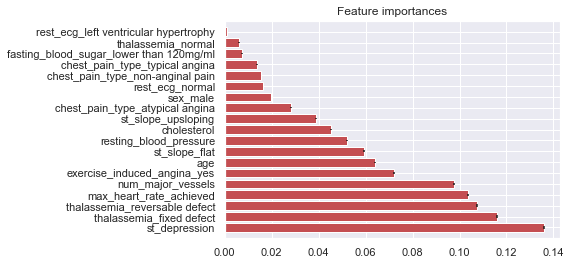

In [21]:
rf=RandomForestModel(train_dataset,train_labels)
TreeFeatureSelection(train_dataset,train_labels,rf)

In [22]:
# 10 fold cross validation score
scores = cross_val_score(rf, train_dataset, train_labels,cv=10)
print("Score {}".format(scores.mean()))

Score 0.8065797101449276


In [23]:
#prediction
predictions = rf.predict(test_dataset)

#view accuracy of dataset
error = mean_squared_error(test_labels,predictions)
accuracy = accuracy_score(test_labels,predictions)
print("Error %f , Accuracy %f"%(error,accuracy))

Error 0.213115 , Accuracy 0.786885


In [24]:
#view classification report
print(metrics.classification_report(predictions, test_labels))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

   micro avg       0.79      0.79      0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



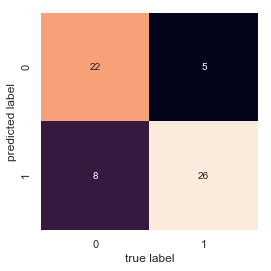

In [25]:
#view confusion matrics
mat = confusion_matrix(test_labels, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

In [84]:
feature_list=list(train_dataset.columns)
important_indices = [feature_list.index('st_depression'), feature_list.index('thalassemia_reversable defect')
                     ,feature_list.index('thalassemia_fixed defect'),feature_list.index('max_heart_rate_achieved'),
                    feature_list.index('num_major_vessels')]
train_important = train_dataset.iloc[:, important_indices]
test_important = test_dataset.iloc[:, important_indices]


In [88]:
rf=RandomForestModel(train_important,train_labels)
scores = cross_val_score(rf, train_important, train_labels,cv=10)
print("Score {}".format(scores.mean()))

#prediction
predictions = rf.predict(test_important)

#view accuracy of dataset
error = mean_squared_error(test_labels,predictions)
accuracy = accuracy_score(test_labels,predictions)
print("Error %f , Accuracy %f"%(error,accuracy))

Score 0.7902463768115944


ValueError: Found input variables with inconsistent numbers of samples: [61, 242]